In [69]:
import pandas as pd
from pathlib import Path # Biblioteca pathlib facilita caminhos e diretórios no python

In [70]:
import funcoes

In [71]:
df = pd.read_csv(Path("../data/turnover.csv"))

In [72]:
df.head()

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,...,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
0,41.0,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,80,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,80,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,80,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,80,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,80,6,3,3,2,2,2,2


In [73]:
df.isna().mean().sort_values(ascending = False).head()

Idade              0.098639
Turnover           0.000000
ViagensTrabalho    0.000000
Departamento       0.000000
DistanciaCasa      0.000000
dtype: float64

In [74]:
# fazendo uma limpeza nos códigos - Refactoring
# def dropar_na(df, coluna, limite_dados_faltantes): # limite_dados_faltantes é só mais um argumento
#    if df[coluna].isna().mean() > limite_dados_faltantes:
#       df = df.dropna(subset=[coluna])
#    return df

In [75]:
df = funcoes.dropar_na(df, 'Idade', 0.05)

AttributeError: module 'funcoes' has no attribute 'dropar_na'

In [ ]:
df = df.dropna(subset='Idade')

In [ ]:
df.isna().mean().sort_values(ascending = False).head()

Idade              0.0
Turnover           0.0
ViagensTrabalho    0.0
Departamento       0.0
DistanciaCasa      0.0
dtype: float64

In [ ]:
len(df)

1325

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1325 non-null   float64
 1   Turnover                     1325 non-null   object 
 2   ViagensTrabalho              1325 non-null   object 
 3   Departamento                 1325 non-null   object 
 4   DistanciaCasa                1325 non-null   int64  
 5   NivelEducacao                1325 non-null   int64  
 6   Educacao                     1325 non-null   object 
 7   NumeroEmpregado              1325 non-null   int64  
 8   NivelSatisfacaoAmbiente      1325 non-null   int64  
 9   Genero                       1325 non-null   object 
 10  PagamentoHora                1325 non-null   int64  
 11  Envolvimento                 1325 non-null   int64  
 12  NivelCargo                   1325 non-null   int64  
 13  Cargo                  

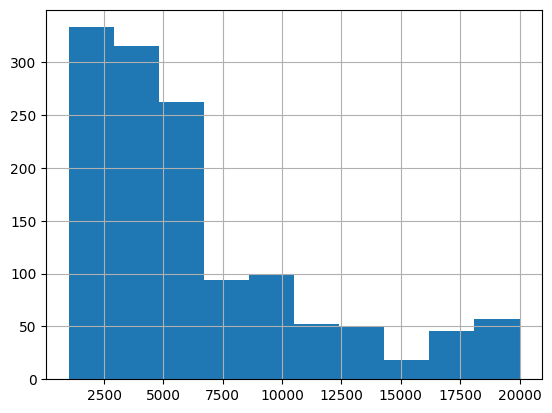

In [ ]:
df['RendaMensal'].hist();

In [ ]:
media = df['RendaMensal'].mean() # calculo da média
dp = df['RendaMensal'].std() # desvio padrão
ls = media + 2*dp # limite superior (como não é uma curva normal fez a multiplicação por 2)
li = media - 2*dp # limite inferior
df = df[(df['RendaMensal'] > li) & (df['RendaMensal'] < ls)]


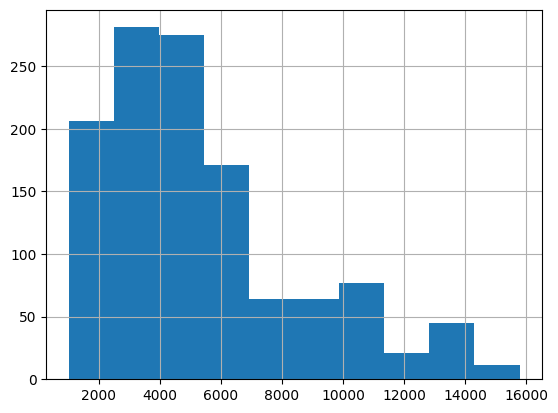

In [ ]:
df['RendaMensal'].hist();

In [ ]:
# fazendo uma limpeza nos códigos - Refactoring
#def limpar_outlier(df, coluna):
#    media = df[coluna].mean() # calculo da média
#    dp = df[coluna].std() # desvio padrão
#    ls = media + 2*dp # limite superior (como não é uma curva normal fez a multiplicação por 2)
#    li = media - 2*dp # limite inferior
#    df = df[(df[coluna] > li) & (df[coluna] < ls)]
#    
#    return df


In [ ]:
df = funcoes.limpar_outlier(df, 'RendaMensal')
df = funcoes.limpar_outlier(df, 'Idade')
